In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [2]:
df = pd.read_csv('parkinsons.data') 

In [3]:
df_status = df[['status']] 
df_status = df_status.to_numpy()

In [4]:
df_status

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [5]:
df = df.drop('name',axis = 1)

In [6]:
df = df.drop('status',axis = 1)

In [7]:
scaler = StandardScaler()

df_scaled = scaler.fit_transform(df)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled, df_status, test_size=0.2,random_state = 21, stratify = df_status)

In [9]:
X_train

array([[-0.87844726, -0.68922009, -0.35862121, ...,  0.92201168,
         1.52623655,  0.60912902],
       [ 0.61724839,  0.31586828,  0.65776508, ...,  1.79129387,
         3.37683091,  1.39656493],
       [-0.82263845, -0.65596224, -0.03466118, ...,  0.37469698,
        -1.38035269,  0.05789829],
       ...,
       [ 0.09665678,  2.68968974, -1.02227509, ...,  0.56219181,
         0.67826321, -0.40545636],
       [-0.21932673,  0.01100284, -0.82211234, ..., -1.18473881,
        -1.61299863,  0.17982787],
       [-1.40788011, -0.96914489, -0.7328926 , ..., -0.85841991,
         0.69178018,  1.35086359]])

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
logisticRegr = LogisticRegression()

In [12]:
import numpy as np

In [13]:
logisticRegr.fit(X_train, np.ravel(y_train,order='C'))

LogisticRegression()

In [14]:
y_pred = logisticRegr.predict(X_test)

In [15]:
score = logisticRegr.score(X_test, y_test)
print(score)

0.8717948717948718


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [18]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 5  5]
 [ 0 29]]


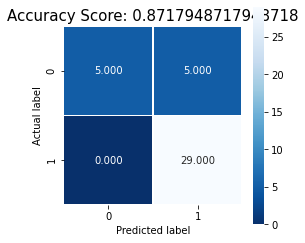

In [22]:
plt.figure(figsize=(4,4))
sns.heatmap(confusion_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Accuracy Score: {0}'.format(score)
plt.title(title, size = 15);

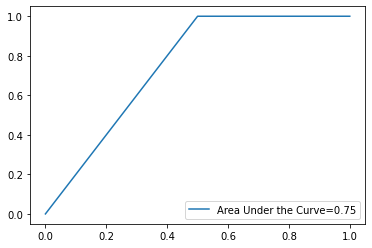

In [25]:
y_pred = logisticRegr.predict(X_test)
fpr, tpr, threshold = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="Area Under the Curve="+str(auc))
plt.legend()
plt.show()

In [27]:
from sklearn.metrics import accuracy_score, f1_score

In [28]:
print("The F1 Score of the model is",f1_score(y_test,y_pred))

The F1 Score of the model is 0.9206349206349206


In [29]:
from sklearn.metrics import precision_score, recall_score

In [30]:
print('Precision: %.3f' % precision_score(y_test, y_pred))

Precision: 0.853


In [31]:
print('Recall : %.3f' % recall_score(y_test, y_pred))

Recall : 1.000
